In [ ]:
!pip install plotly-express

In [ ]:
#Importação das bibliotecas necessárias
from sklearn.decomposition import PCA
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import plotly_express as px
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

Esse trabalho visa uma comparação entre entre os algoritmos de PCA, para redução de dimensionalidade, através dos diferentes números de componentes, e também o algoritmo de clusterização K-Means. Após a aplicação do porcesso de redução, os dados são envidados para algoritmos de K-Means para a formação de agrupamentos, a fim de indentificar as 3 espécies de flores iris após a redução da dimensionalidade dos dados.  

##Análise exploratória

Primeiramente, devemos iniciar uma análise exploratória em cima dos dados, com o objetivo de verificar a distribuição ou alguma inconsistência, tais como a presença de outliers, nulos e duplicações. 

In [ ]:
# Carregamento do dataset iris
iris = datasets.load_iris()
# iris.data
# iris.feature_names

In [ ]:
#Exibição dos dados de pétala e sépala, e também do target (espécie)
df_iris = pd.DataFrame(iris.data, columns=['sepal length (cm)','sepal width (cm)', 'petal length (cm)','petal width (cm)'])
# 0: setosa
#1: versicolor
# 2: virginica
df_iris['target'] = iris.target
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
#Verificando informações do dataframe
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
#Realizando uma análise estatística nos dados
df_iris.iloc[:, 0:4].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Text(0.5, 1.0, 'Gráfico de correlação')

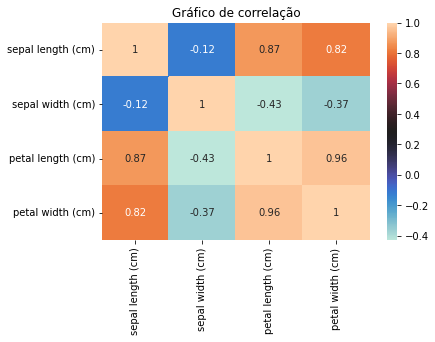

In [ ]:
#Verificando a correlação dos dados
correlation = df_iris.iloc[:, 0:4].corr()
sns.heatmap(correlation, annot=True, cmap='icefire')
plt.title('Gráfico de correlação')

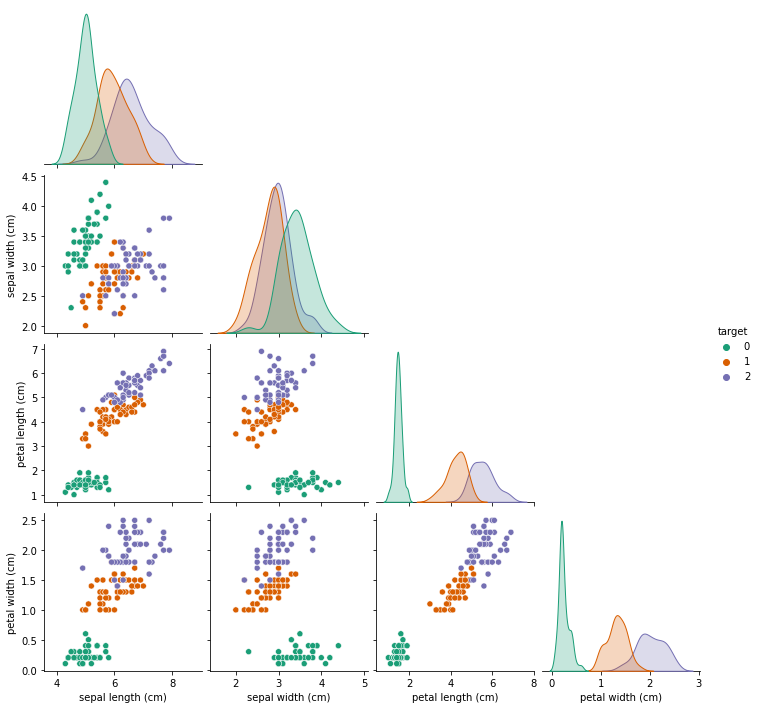

In [ ]:
#Exibindo a relação dos dados
sns.pairplot(df_iris, hue='target', corner=True, palette='Dark2')
plt.show()

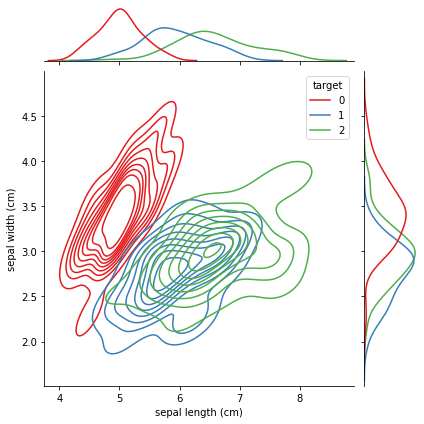

In [ ]:
# Utilizando o Jointplot para analisar a relação entre as variáveis  sepal length (cm) e sepal width (cm) ​​e descrever suas distribuições individuais no mesmo gráfico
sns.jointplot(x="sepal length (cm)", y="sepal width (cm)",hue='target',  data=df_iris, kind="kde", palette='Set1')

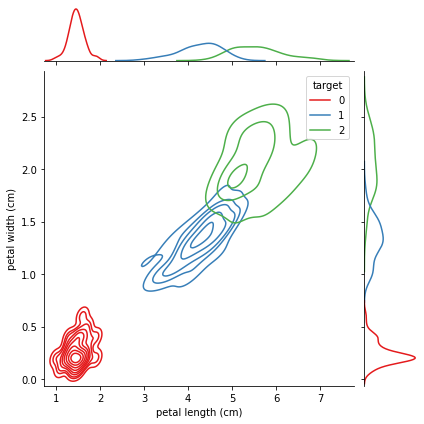

In [ ]:
# Utilizando o Jointplot para analisar a relação entre as variáveis petal length (cm) e petal width (cm) ​​e descrever suas distribuições individuais no mesmo gráfico
sns.jointplot(x="petal length (cm)", y="petal width (cm)", hue='target',  data=df_iris, kind="kde", palette='Set1')

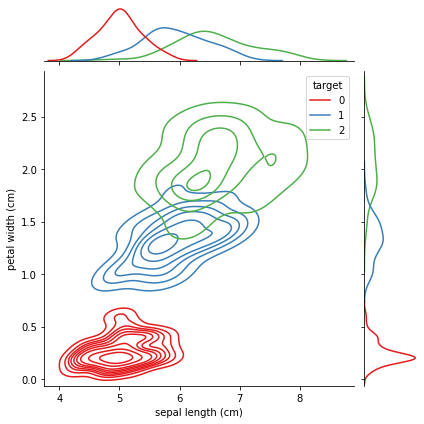

In [ ]:
# Utilizando o Jointplot para analisar a relação entre as variáveis sepal length (cm) e petal width (cm) ​​e descrever suas distribuições individuais no mesmo gráfico
sns.jointplot(x="sepal length (cm)", y="petal width (cm)",  hue='target',  data=df_iris, kind="kde", palette='Set1')

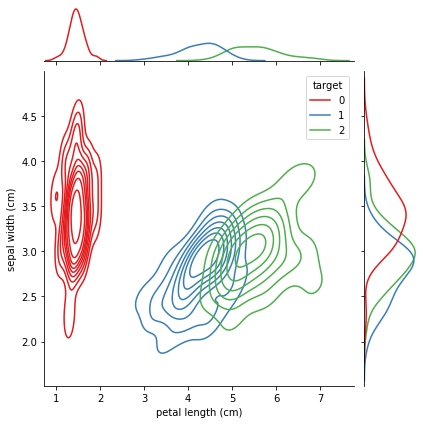

In [ ]:
# Utilizando o Jointplot para analisar a relação entre as variáveis petal length (cm) e sepal width (cm) ​​e descrever suas distribuições individuais no mesmo gráfico
sns.jointplot(x="petal length (cm)", y="sepal width (cm)",  hue='target',  data=df_iris, kind="kde", palette='Set1')

In [ ]:
# Exibição do gráfico 3D relacionando as variáveis sepal length (cm), sepal width (cm) e petal width (cm) afim de verificar a distribuição dos dados
iris3d = px.scatter_3d(df_iris, x='sepal length (cm)', y='sepal width (cm)', z='petal width (cm)',color='target')
iris3d.show()

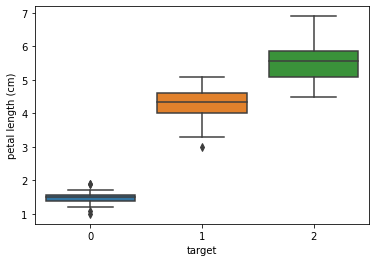

In [ ]:
#Verificação de possíveis outliers nos dados de petal length (cm) através do boxplot
sns.boxplot(x="target",y="petal length (cm)", data=df_iris)
plt.show()

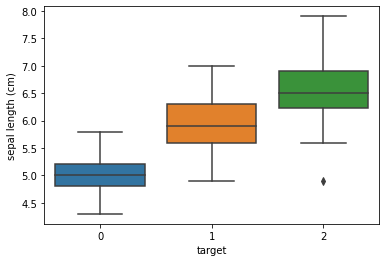

In [ ]:
#Verificação de possíveis outliers nos dados de sepal length (cm) através do boxplot
sns.boxplot(x="target",y="sepal length (cm)", data=df_iris)
plt.show()

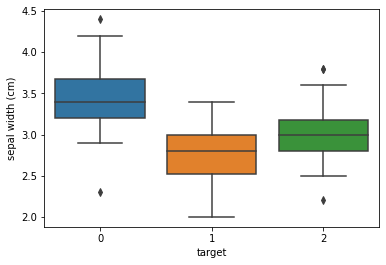

In [ ]:
#Verificação de possíveis outliers nos dados de sepal width (cm) através do boxplot
sns.boxplot(x="target",y="sepal width (cm)", data=df_iris)
plt.show()

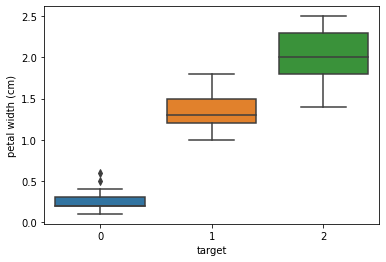

In [ ]:
#Verificação de possíveis outliers nos dados de petal width (cm) através do boxplot
sns.boxplot(x="target",y="petal width (cm)", data=df_iris)
plt.show()

#**Aplicação dos algoritmos**

O primeiro passo para realizar a aplicação dos algoritmos, é a divisão dos dados entre a features que serão análisadas pelos algoritmos e a resposta (ground truth). 

Os modelos foram divididos em K-Means normal (sem a aplicação do PCA), PCA com componete igual a 1, PCA com componete igual a 2 e PCA com componete igual a 3, os quais realização o agrupamento através do K-Means.

### Avaliações
Para a avalição dos modelos foram utilizadas métricas apropriadas, levando em consideração a particularidade de cada um.

K-Means: Foi realizada a avaliação por meio da métrica sillhoutte (para avaliar a consistência dos agrupamentos) e  matriz confusão (para chegar as predições do algoritmo).


PCA: Foi utilizada a métrica Mean Squared Error (MSE) para verificar o quão o PCA foi em gerar a nova representação desses dados. Essa avalição aplicada após a transformação dos dados para o espaço original.

Também foram utlizados gráficos para checar a nova relação dos grupos.

In [ ]:
#Divisão dos dados
X = iris.data
y = iris.target

###K-Means normal

In [ ]:
# Aplicação do algoritmo de clusterização Kmeans
kmeans = KMeans(n_clusters=3, random_state=None).fit(X)

In [ ]:
#Comparação entre a labels verdadeiras e preditas
print('Iris target:',iris.target)
k_pred = kmeans.labels_
print('Predição do Kmeans:',k_pred)

Iris target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Predição do Kmeans: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [ ]:
#Armazenando a localização em Dataframe
#Armazenando a prediação em Dataframe
df_kmeans = pd.DataFrame(k_pred)

In [ ]:
#Aplicação da métrica Silhouette
# Verificar a similaridade dos componentes que compõem um cluster
print(f'Silhouette Score(n=3): {silhouette_score(X, k_pred)}')

Silhouette Score(n=3): 0.5528190123564091


Text(0.5, 1.0, 'Matriz de confusão')

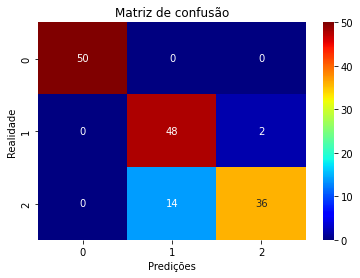

In [ ]:
#Exibindo a matriz de confusão 
data = {'target': iris.target,
        'pred': k_pred}

df = pd.DataFrame(data, columns=['target','pred'])

matriz = pd.crosstab(df['target'], df['pred'], rownames=['Realidade'], colnames=['Predições'])
sns.heatmap(matriz, annot=True, cmap='jet')
plt.title('Matriz de confusão')

In [ ]:
#Avaliação das métricas de precision, recall e f1-score 
print(classification_report(df['target'], df['pred'], target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.77      0.96      0.86        50
   virginica       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



### PCA com componente igual a 1

Como o algoritmo de PCA tende a maximizar a variância dos dados, onde a variância explicada dos componentes é desbalanceada. Tendo isso em vista, uma normalização se tornou necessária. Deste modo, os outros componentes puderam contribuir melhor para a variância explicada.

In [ ]:
#Definição da normalização standard scaler
scaler = StandardScaler()

In [ ]:
#Treinamento do dados 
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
#Média dos valores de cada coluna do conjunto de treinamento
print('Média dos valores do conjunto de treinamento:',scaler.mean_)

Média dos valores do conjunto de treinamento: [5.84333333 3.05733333 3.758      1.19933333]


In [ ]:
# Escalonamento dos dados
X = scaler.transform(X)

In [ ]:
#Aplicação do PCA para a redução de dimensionalidade dos dados
pca = PCA(n_components=1)
pca1 = pca.fit(X)

In [ ]:
# Porcentagem de variância explicada por cada um dos componentes.
print('Variância explicada para PCA com componente igual a 1:',pca1.explained_variance_ratio_)

Variância explicada para PCA com componente igual a 1: [0.72962445]


In [ ]:
# Os valores singulares correspondentes a cada um dos componentes selecionados.
print('Valores singurales  para PCA com componente igual a 1:',pca1.singular_values_)

Valores singurales  para PCA com componente igual a 1: [20.92306556]


In [ ]:
pca1 = pca1.transform(X)

In [ ]:
#Armazenando os valores após a redução de dimensionalidade
df_PCA1 = pd.DataFrame(pca1, columns=['C1'])

In [ ]:
#Avaliação do PCA através da transformação inversa
pca_reconstructed = pca.inverse_transform(df_PCA1)
MSE = mean_squared_error(X, pca_reconstructed)
print('MSE:', MSE)

MSE: 0.27037554586700135


In [ ]:
#Aplicação do Kmeans para realizar um novo agrupamento
kmeans1 = KMeans(n_clusters=3, random_state=None).fit(pca1)

In [ ]:
#Comparação entre a labels verdadeiras e preditas
print('Iris target:',iris.target)
k_pred1 = kmeans1.labels_
print('Predição do Kmeans:',k_pred1)

Iris target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Predição do Kmeans: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1
 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 1]


In [ ]:
#Aplicação da métrica Silhouette
# Verificar a similaridade dos componentes que compõem um cluster
print(f'Silhouette Score(n=1): {silhouette_score(pca1, k_pred1)}')

Silhouette Score(n=1): 0.6754183875905302


In [ ]:
#Armazenando a coluna dos componentes em Dataframe
df_kmeans1 = pd.DataFrame(pca1, columns=['C1'])
#Armazenando a localização em Dataframe
df_kmeans1['pred'] = k_pred1
df_kmeans1

,C1,pred
0,-2.264703,0
1,-2.080961,0
2,-2.364229,0
3,-2.299384,0
4,-2.389842,0
...,...,...
145,1.870503,2
146,1.564580,2
147,1.521170,2
148,1.372788,2


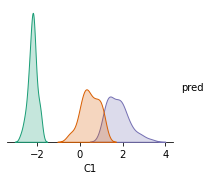

In [ ]:
#Verificando a relação dos dados
sns.pairplot(df_kmeans1, hue='pred', corner=True, palette='Dark2')
plt.show()

Text(0.5, 1.0, 'Matriz de confusão')

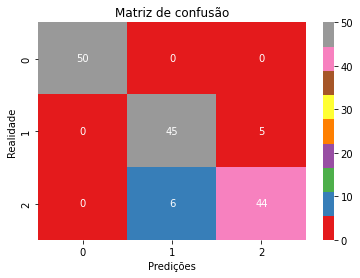

In [ ]:
#Exibindo a matriz de confusão
data = {'target': iris.target,
        'pred': k_pred1}

df = pd.DataFrame(data, columns=['target','pred'])

matriz = pd.crosstab(df['target'], df['pred'], rownames=['Realidade'], colnames=['Predições'])
sns.heatmap(matriz, annot=True, cmap='Set1')
plt.title('Matriz de confusão')

In [ ]:
#Avaliação das métricas de precision, recall e f1-score 
print(classification_report(df['target'], df['pred'], target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.88      0.90      0.89        50
   virginica       0.90      0.88      0.89        50

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150



### PCA com componente igual a 2

In [ ]:
#Definição da normalização standard scaler
scaler = StandardScaler()

In [ ]:
#Treinamento do dados 
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
#Média dos valores de cada coluna do conjunto de treinamento
print('Média dos valores do conjunto de treinamento:',scaler.mean_)

Média dos valores do conjunto de treinamento: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]


In [ ]:
# Escalonamento dos dados
X = scaler.transform(X)

In [ ]:
#Aplicação do PCA para a redução de dimensionalidade dos dados
pca = PCA(n_components=2)
pca2 = pca.fit(X)

In [ ]:
# Porcentagem de variância explicada por cada um dos componentes.
print('Variância explicada para PCA com componente igual a 2:', pca2.explained_variance_ratio_)

Variância explicada para PCA com componente igual a 2: [0.72962445 0.22850762]


In [ ]:
# Os valores singulares correspondentes a cada um dos componentes selecionados.
print('Valores singurales  para PCA com componente igual a 2:',pca2.singular_values_)

Valores singurales  para PCA com componente igual a 2: [20.92306556 11.7091661 ]


In [ ]:
pca2 = pca2.transform(X)

In [ ]:
#Armazenando os valores após a redução de dimensionalidade
df_PCA2 = pd.DataFrame(pca2, columns=['C1', 'C2'])

In [ ]:
#Avaliação do PCA através da transformação inversa
pca_reconstructed = pca.inverse_transform(df_PCA2)
MSE = mean_squared_error(X, pca_reconstructed)
print('MSE:', MSE)

MSE: 0.041867927999983595


In [ ]:
#Aplicação do Kmeans para realizar um novo agrupamento
kmeans2 = KMeans(n_clusters=3, random_state=None).fit(pca2)
kmeans2

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#Comparação entre a labels verdadeiras e preditas
print('Iris target:',iris.target)
k_pred2 = kmeans2.labels_
print('Predição do Kmeans:',k_pred2)

Iris target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Predição do Kmeans: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [ ]:
#Aplicação da métrica Silhouette
# Verificar a similaridade dos componentes que compõem um cluster
print(f'Silhouette Score(n=2): {silhouette_score(pca2, k_pred2)}')

Silhouette Score(n=2): 0.5091683341538227


In [ ]:
#Armazenando as colunas dos componentes em Dataframe
df_kmeans2 = pd.DataFrame(pca2, columns=['C1', 'C2'])
#Armazenando a localização em Dataframe
df_kmeans2['pred'] = k_pred2
df_kmeans2

,C1,C2,pred
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,1
146,1.564580,-0.896687,2
147,1.521170,0.269069,1
148,1.372788,1.011254,1


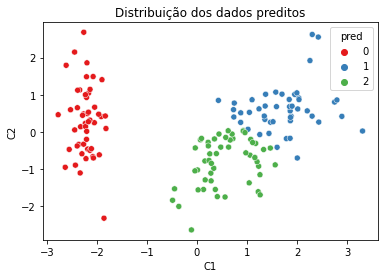

In [ ]:
# Verificando a nova distribuição dos dados 
sns.scatterplot(x=df_kmeans2['C1'], y=df_kmeans2['C2'], hue =df_kmeans2['pred'], palette='Set1')
plt.title('Distribuição dos dados preditos')
plt.show()

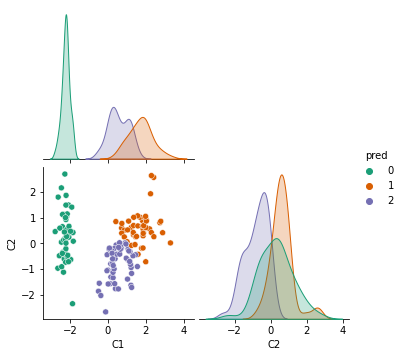

In [ ]:
#Verificando a relação dos dados
sns.pairplot(df_kmeans2, hue='pred', corner=True, palette='Dark2')
plt.show()

Text(0.5, 1.0, 'Matriz de confusão')

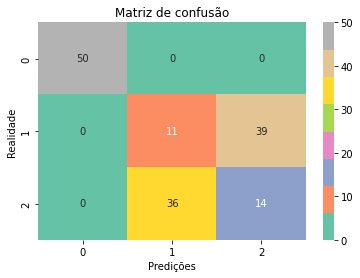

In [ ]:
#Exibindo a matriz de confusão
data = {'target': iris.target,
        'pred': k_pred2}

df = pd.DataFrame(data, columns=['target','pred'])

matriz = pd.crosstab(df['target'], df['pred'], rownames=['Realidade'], colnames=['Predições'])
sns.heatmap(matriz, annot=True, cmap='Set2')
plt.title('Matriz de confusão')

In [ ]:
#Avaliação das métricas de precision, recall e f1-score 
print(classification_report(df['target'], df['pred'], target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.23      0.22      0.23        50
   virginica       0.26      0.28      0.27        50

    accuracy                           0.50       150
   macro avg       0.50      0.50      0.50       150
weighted avg       0.50      0.50      0.50       150



### PCA com componente igual a 3

In [ ]:
#Definição da normalização standard scaler
scaler = StandardScaler()

In [ ]:
#Treinamento do dados 
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
#Média dos valores de cada coluna do conjunto de treinamento
print('Média dos valores do conjunto de treinamento:',scaler.mean_)

Média dos valores do conjunto de treinamento: [ 1.79578574e-16  1.09171931e-17 -5.58812256e-16  5.27726011e-16]


In [ ]:
# Escalonamento dos dados
X = scaler.transform(X)

In [ ]:
#Aplicação do PCA para a redução de dimensionalidade dos dados
pca = PCA(n_components=3)
pca3 = pca.fit(X)

In [ ]:
# Porcentagem de variância explicada por cada um dos componentes.
print('Variância explicada para PCA com componente igual a 3:',pca3.explained_variance_ratio_)

Variância explicada para PCA com componente igual a 3: [0.72962445 0.22850762 0.03668922]


In [ ]:
# Os valores singulares correspondentes a cada um dos componentes selecionados.
print('Valores singurales  para PCA com componente igual a 3:',pca3.singular_values_)

Valores singurales  para PCA com componente igual a 3: [20.92306556 11.7091661   4.69185798]


In [ ]:
pca3 = pca3.transform(X)

In [ ]:
#Avaliação do PCA através da transformação inversa
df_PCA3 = pd.DataFrame(pca3, columns=['C1', 'C2', 'C3'])
pca_reconstructed = pca.inverse_transform(df_PCA3)
MSE = mean_squared_error(X, pca_reconstructed)
print('MSE:', MSE)

MSE: 0.005178709107154797


In [ ]:
#Aplicação do Kmeans para realizar um novo agrupamento
kmeans3 = KMeans(n_clusters=3, random_state=None).fit(pca3)

In [ ]:
#Comparação entre a labels verdadeiras e preditas
print('Iris target:',iris.target)
k_pred3 = kmeans3.labels_
print('Predição do Kmeans:',k_pred3)

Iris target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Predição do Kmeans: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 1 2 2
 1 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [ ]:
#Aplicação da métrica Silhouette
# Verificar a similaridade dos componentes que compõem um cluster
print(f'Silhouette Score(n=3): {silhouette_score(pca3, k_pred3)}')

Silhouette Score(n=3): 0.46928366701283647


In [ ]:
#Armazenando as colunas dos componentes em Dataframe
df_kmeans3 = pd.DataFrame(pca3, columns=['C1', 'C2', 'C3'])
#Armazenando a predição em Dataframe
df_kmeans3['pred'] = k_pred3
df_kmeans3

,C1,C2,C3,pred
0,-2.264703,0.480027,-0.127706,0
1,-2.080961,-0.674134,-0.234609,0
2,-2.364229,-0.341908,0.044201,0
3,-2.299384,-0.597395,0.091290,0
4,-2.389842,0.646835,0.015738,0
...,...,...,...,...
145,1.870503,0.386966,0.256274,2
146,1.564580,-0.896687,-0.026371,1
147,1.521170,0.269069,0.180178,2
148,1.372788,1.011254,0.933395,2


In [ ]:
# Verificando a nova distribuição dos dados em 3D
fig = px.scatter_3d(df_kmeans3, x=df_kmeans3['C1'], y=df_kmeans3['C2'], z=df_kmeans3['C3'], color=df_kmeans3['pred'])
fig.show()

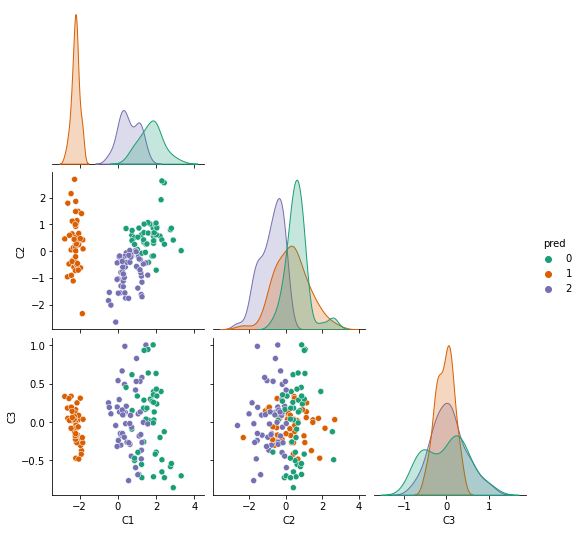

In [ ]:
#Verificando a relação dos dados
sns.pairplot(df_kmeans3, hue='pred', corner=True, palette='Dark2')
plt.show()

Text(0.5, 1.0, 'Matriz de confusão')

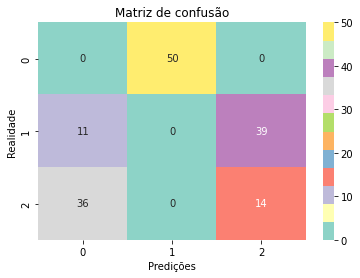

In [ ]:
#Exibindo a matriz de confusão
data = {'target': iris.target,
        'pred': k_pred3}

df = pd.DataFrame(data, columns=['target','pred'])

matriz = pd.crosstab(df['target'], df['pred'], rownames=['Realidade'], colnames=['Predições'])
sns.heatmap(matriz, annot=True, cmap='Set3')
plt.title('Matriz de confusão')

In [ ]:
#Avaliação das métricas de precision, recall e f1-score 
print(classification_report(df['target'], df['pred'], target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        50
  versicolor       0.00      0.00      0.00        50
   virginica       0.26      0.28      0.27        50

    accuracy                           0.09       150
   macro avg       0.09      0.09      0.09       150
weighted avg       0.09      0.09      0.09       150



##Referências 

https://seaborn.pydata.org/generated/seaborn.jointplot.html

https://www.hackerearth.com/blog/developers/data-visualization-techniques/#:~:text=Jointplot%20is%20seaborn%20library%20specific,distributions%20on%20the%20same%20plot.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

https://stats.stackexchange.com/questions/69157/why-do-we-need-to-normalize-data-before-principal-component-analysis-pca